In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('Dataset/flight dataset.csv')
df.head()

,Airline,Flight_Type,Source,Destination,Stops,Journey_Date,Day_of_Week,Month,Departure_Time,Arrival_Time,Duration_Hours,Ticket_Class,Booking_Days_Before,Baggage_Allowance_Kg,Meal_Included,Fuel_Price_Impact,Peak_Season,Flight_Price_INR
0,SpiceJet,International,Dubai,Mumbai,1,2023-01-01,Monday,January,Afternoon,Early Morning,4,First Class,259,30,No,1.001521,Yes,29317
1,Lufthansa,Domestic,London,Mumbai,2,2023-01-01,Monday,January,Night,Evening,9,Business,248,20,Yes,1.128425,Yes,153856
2,GoAir,International,Delhi,Dubai,1,2023-01-01,Monday,January,Afternoon,Early Morning,4,First Class,155,20,Yes,0.942923,Yes,31483
3,Qatar Airways,Domestic,Mumbai,London,0,2023-01-01,Monday,January,Late Night,Night,10,First Class,330,25,Yes,1.084447,Yes,179256
4,Vistara,International,Delhi,Kolkata,1,2023-01-01,Monday,January,Night,Night,2,Business,36,25,No,1.199959,No,14746


In [3]:
np.sort(df.Fuel_Price_Impact.unique())

array([0.80009156, 0.80016493, 0.80020207, ..., 1.19990131, 1.19995917,
       1.19996678])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11444 entries, 0 to 11443
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airline               11444 non-null  object 
 1   Flight_Type           11444 non-null  object 
 2   Source                11444 non-null  object 
 3   Destination           11444 non-null  object 
 4   Stops                 11444 non-null  int64  
 5   Journey_Date          11444 non-null  object 
 6   Day_of_Week           11444 non-null  object 
 7   Month                 11444 non-null  object 
 8   Departure_Time        11444 non-null  object 
 9   Arrival_Time          11444 non-null  object 
 10  Duration_Hours        11444 non-null  int64  
 11  Ticket_Class          11444 non-null  object 
 12  Booking_Days_Before   11444 non-null  int64  
 13  Baggage_Allowance_Kg  11444 non-null  int64  
 14  Meal_Included         11444 non-null  object 
 15  Fuel_Price_Impact  

In [5]:
df.columns

Index(['Airline', 'Flight_Type', 'Source', 'Destination', 'Stops',
       'Journey_Date', 'Day_of_Week', 'Month', 'Departure_Time',
       'Arrival_Time', 'Duration_Hours', 'Ticket_Class', 'Booking_Days_Before',
       'Baggage_Allowance_Kg', 'Meal_Included', 'Fuel_Price_Impact',
       'Peak_Season', 'Flight_Price_INR'],
      dtype='object')

In [6]:
df.describe()

,Stops,Duration_Hours,Booking_Days_Before,Baggage_Allowance_Kg,Fuel_Price_Impact,Flight_Price_INR
count,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000
mean,0.999301,4.095246,180.368577,22.540196,0.997909,40016.704649
std,0.811522,4.177046,101.875079,5.618338,0.116121,63235.711823
min,0.000000,0.000000,1.000000,15.000000,0.800092,1901.000000
25%,0.000000,2.000000,92.000000,15.000000,0.895008,8492.000000
50%,1.000000,3.000000,181.000000,25.000000,0.999792,13765.000000
75%,2.000000,4.000000,272.000000,30.000000,1.096462,34230.000000
max,2.000000,17.000000,330.000000,30.000000,1.199967,466783.000000


In [7]:
df.head()

,Airline,Flight_Type,Source,Destination,Stops,Journey_Date,Day_of_Week,Month,Departure_Time,Arrival_Time,Duration_Hours,Ticket_Class,Booking_Days_Before,Baggage_Allowance_Kg,Meal_Included,Fuel_Price_Impact,Peak_Season,Flight_Price_INR
0,SpiceJet,International,Dubai,Mumbai,1,2023-01-01,Monday,January,Afternoon,Early Morning,4,First Class,259,30,No,1.001521,Yes,29317
1,Lufthansa,Domestic,London,Mumbai,2,2023-01-01,Monday,January,Night,Evening,9,Business,248,20,Yes,1.128425,Yes,153856
2,GoAir,International,Delhi,Dubai,1,2023-01-01,Monday,January,Afternoon,Early Morning,4,First Class,155,20,Yes,0.942923,Yes,31483
3,Qatar Airways,Domestic,Mumbai,London,0,2023-01-01,Monday,January,Late Night,Night,10,First Class,330,25,Yes,1.084447,Yes,179256
4,Vistara,International,Delhi,Kolkata,1,2023-01-01,Monday,January,Night,Night,2,Business,36,25,No,1.199959,No,14746


In [8]:
from sklearn.preprocessing import OrdinalEncoder
encoder_Peak_Season=OrdinalEncoder(categories=[['No','Yes']])
y=encoder_Peak_Season.fit_transform(df[['Peak_Season']])
y=pd.Series(y.flatten().astype(int))
df['Peak_Season']=y

In [9]:
encoder_Meal_Included=OrdinalEncoder(categories=[['No','Yes']])
y=encoder_Meal_Included.fit_transform(df[['Meal_Included']])
y=pd.Series(y.flatten().astype(int))
df['Meal_Included']=y

In [10]:
encoder_Ticket_Class=OrdinalEncoder(categories=[['Economy', 'Business', 'First Class']])
y=encoder_Ticket_Class.fit_transform(df[['Ticket_Class']])
y=pd.Series(y.flatten().astype(int))
df['Ticket_Class']=y

In [11]:
encoder_Arrival_Time=OrdinalEncoder(categories=[['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night','Late Night']])
y=encoder_Arrival_Time.fit_transform(df[['Arrival_Time']])
y=pd.Series(y.flatten().astype(int))
df['Arrival_Time']=y

In [12]:
encoder_Departure_Time=OrdinalEncoder(categories=[['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night','Late Night']])
y=encoder_Departure_Time.fit_transform(df[['Departure_Time']])
y=pd.Series(y.flatten().astype(int))
df['Departure_Time']=y

In [13]:
df.head()

,Airline,Flight_Type,Source,Destination,Stops,Journey_Date,Day_of_Week,Month,Departure_Time,Arrival_Time,Duration_Hours,Ticket_Class,Booking_Days_Before,Baggage_Allowance_Kg,Meal_Included,Fuel_Price_Impact,Peak_Season,Flight_Price_INR
0,SpiceJet,International,Dubai,Mumbai,1,2023-01-01,Monday,January,2,0,4,2,259,30,0,1.001521,1,29317
1,Lufthansa,Domestic,London,Mumbai,2,2023-01-01,Monday,January,4,3,9,1,248,20,1,1.128425,1,153856
2,GoAir,International,Delhi,Dubai,1,2023-01-01,Monday,January,2,0,4,2,155,20,1,0.942923,1,31483
3,Qatar Airways,Domestic,Mumbai,London,0,2023-01-01,Monday,January,5,4,10,2,330,25,1,1.084447,1,179256
4,Vistara,International,Delhi,Kolkata,1,2023-01-01,Monday,January,4,4,2,1,36,25,0,1.199959,0,14746


In [14]:
import pickle
with open('Models/encoder_Peak_Season.pkl', 'wb') as file:
    pickle.dump(encoder_Peak_Season, file)
with open('Models/encoder_Meal_Included.pkl', 'wb') as file:
    pickle.dump(encoder_Meal_Included, file)
with open('Models/encoder_Ticket_Class.pkl', 'wb') as file:
    pickle.dump(encoder_Ticket_Class, file)
with open('Models/encoder_Arrival_Time.pkl', 'wb') as file:
    pickle.dump(encoder_Arrival_Time, file)
with open('Models/encoder_Departure_Time.pkl', 'wb') as file:
    pickle.dump(encoder_Departure_Time, file)

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded=encoder.fit_transform(df[['Airline','Day_of_Week','Month','Source','Destination','Flight_Type']]).astype(int).toarray()

In [16]:
encoded_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [17]:
encoded_df.head()

,Airline_Air India,Airline_Emirates,Airline_GoAir,Airline_IndiGo,Airline_Lufthansa,Airline_Qatar Airways,Airline_SpiceJet,Airline_Vistara,Day_of_Week_Friday,Day_of_Week_Monday,...,Destination_Chennai,Destination_Delhi,Destination_Dubai,Destination_Hyderabad,Destination_Kolkata,Destination_London,Destination_Mumbai,Destination_New York,Flight_Type_Domestic,Flight_Type_International
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


In [18]:
df.drop(['Airline','Day_of_Week','Month','Source','Destination','Flight_Type'],axis=1,inplace=True)

In [19]:
df=pd.concat([df,encoded_df],axis=1)

In [20]:
df.head()

,Stops,Journey_Date,Departure_Time,Arrival_Time,Duration_Hours,Ticket_Class,Booking_Days_Before,Baggage_Allowance_Kg,Meal_Included,Fuel_Price_Impact,...,Destination_Chennai,Destination_Delhi,Destination_Dubai,Destination_Hyderabad,Destination_Kolkata,Destination_London,Destination_Mumbai,Destination_New York,Flight_Type_Domestic,Flight_Type_International
0,1,2023-01-01,2,0,4,2,259,30,0,1.001521,...,0,0,0,0,0,0,1,0,0,1
1,2,2023-01-01,4,3,9,1,248,20,1,1.128425,...,0,0,0,0,0,0,1,0,1,0
2,1,2023-01-01,2,0,4,2,155,20,1,0.942923,...,0,0,1,0,0,0,0,0,0,1
3,0,2023-01-01,5,4,10,2,330,25,1,1.084447,...,0,0,0,0,0,1,0,0,1,0
4,1,2023-01-01,4,4,2,1,36,25,0,1.199959,...,0,0,0,0,1,0,0,0,0,1


In [21]:
with open('Models/OneHot_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [22]:
df.Journey_Date

0        2023-01-01
1        2023-01-01
2        2023-01-01
3        2023-01-01
4        2023-01-01
            ...    
11439    2025-03-19
11440    2025-03-19
11441    2025-03-19
11442    2025-03-19
11443    2025-03-19
Name: Journey_Date, Length: 11444, dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11444 entries, 0 to 11443
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Stops                      11444 non-null  int64  
 1   Journey_Date               11444 non-null  object 
 2   Departure_Time             11444 non-null  int64  
 3   Arrival_Time               11444 non-null  int64  
 4   Duration_Hours             11444 non-null  int64  
 5   Ticket_Class               11444 non-null  int64  
 6   Booking_Days_Before        11444 non-null  int64  
 7   Baggage_Allowance_Kg       11444 non-null  int64  
 8   Meal_Included              11444 non-null  int64  
 9   Fuel_Price_Impact          11444 non-null  float64
 10  Peak_Season                11444 non-null  int64  
 11  Flight_Price_INR           11444 non-null  int64  
 12  Airline_Air India          11444 non-null  int64  
 13  Airline_Emirates           11444 non-null  int

In [24]:
df['Journey_Date']=df['Journey_Date'].str.split('-').str[2]

In [25]:
df['Journey_Date']=df['Journey_Date'].astype(int)

In [26]:
df.head()

,Stops,Journey_Date,Departure_Time,Arrival_Time,Duration_Hours,Ticket_Class,Booking_Days_Before,Baggage_Allowance_Kg,Meal_Included,Fuel_Price_Impact,...,Destination_Chennai,Destination_Delhi,Destination_Dubai,Destination_Hyderabad,Destination_Kolkata,Destination_London,Destination_Mumbai,Destination_New York,Flight_Type_Domestic,Flight_Type_International
0,1,1,2,0,4,2,259,30,0,1.001521,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4,3,9,1,248,20,1,1.128425,...,0,0,0,0,0,0,1,0,1,0
2,1,1,2,0,4,2,155,20,1,0.942923,...,0,0,1,0,0,0,0,0,0,1
3,0,1,5,4,10,2,330,25,1,1.084447,...,0,0,0,0,0,1,0,0,1,0
4,1,1,4,4,2,1,36,25,0,1.199959,...,0,0,0,0,1,0,0,0,0,1


In [27]:
df.to_csv('Dataset/Processed/Updated_flight_dataset.csv')

In [28]:
x=df.drop('Flight_Price_INR',axis=1)
y=df['Flight_Price_INR']

In [29]:
x.head()

,Stops,Journey_Date,Departure_Time,Arrival_Time,Duration_Hours,Ticket_Class,Booking_Days_Before,Baggage_Allowance_Kg,Meal_Included,Fuel_Price_Impact,...,Destination_Chennai,Destination_Delhi,Destination_Dubai,Destination_Hyderabad,Destination_Kolkata,Destination_London,Destination_Mumbai,Destination_New York,Flight_Type_Domestic,Flight_Type_International
0,1,1,2,0,4,2,259,30,0,1.001521,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4,3,9,1,248,20,1,1.128425,...,0,0,0,0,0,0,1,0,1,0
2,1,1,2,0,4,2,155,20,1,0.942923,...,0,0,1,0,0,0,0,0,0,1
3,0,1,5,4,10,2,330,25,1,1.084447,...,0,0,0,0,0,1,0,0,1,0
4,1,1,4,4,2,1,36,25,0,1.199959,...,0,0,0,0,1,0,0,0,0,1


In [30]:
x.columns

Index(['Stops', 'Journey_Date', 'Departure_Time', 'Arrival_Time',
       'Duration_Hours', 'Ticket_Class', 'Booking_Days_Before',
       'Baggage_Allowance_Kg', 'Meal_Included', 'Fuel_Price_Impact',
       'Peak_Season', 'Airline_Air India', 'Airline_Emirates', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Lufthansa', 'Airline_Qatar Airways',
       'Airline_SpiceJet', 'Airline_Vistara', 'Day_of_Week_Friday',
       'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday',
       'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Source_Bangalore', 'Source_Chennai', 'Source_Delhi', 'Source_Dubai',
       'Source_Hyderabad', 'Source_Kolkata', 'Source_London', 'Source_Mumbai',
       'Source_New York', 'Destination_Bangalore', 'Desti

In [31]:
y.head()

0     29317
1    153856
2     31483
3    179256
4     14746
Name: Flight_Price_INR, dtype: int64

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

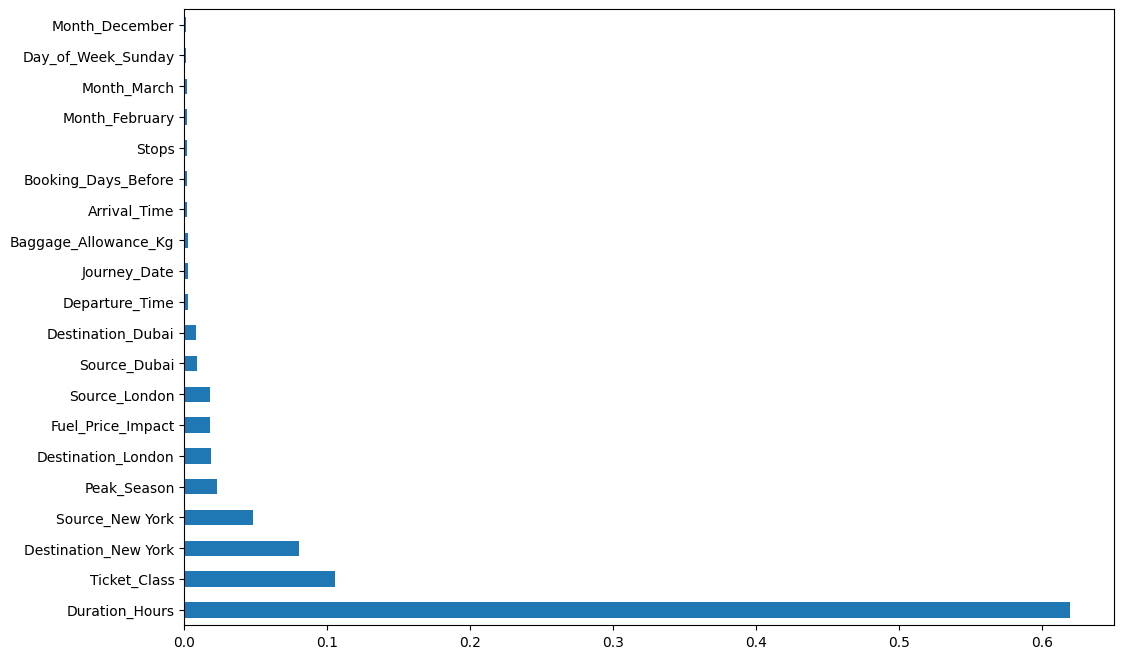

In [33]:
plt.figure(figsize=(12,8))
feat_importance=pd.Series(selection.feature_importances_,index=x.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [36]:
from sklearn.metrics import r2_score,mean_absolute_error
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

14408.127583104739
0.8510379736385101


## Support Vector Machine

In [37]:
from sklearn.svm import SVR
regressor=SVR(kernel='linear')
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [38]:
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

17087.11280951098
0.6465050105609952


In [39]:
from sklearn.model_selection import GridSearchCV
grid = {
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear']
}
grid_search = GridSearchCV(SVR(),param_grid=grid,refit=True,cv=5,verbose=3)
grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(x_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.022 total time=   1.6s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.026 total time=   1.5s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.047 total time=   1.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.037 total time=   1.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.029 total time=   1.6s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.022 total time=   1.6s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.026 total time=   1.5s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.047 total time=   1.5s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.037 total time=   1.4s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.029 total time=   1.4s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.022 total time=   1.4s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

In [40]:
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

13808.036753901824
0.7900695049675568


## K Nearest Neighbour

In [41]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [42]:
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

15048.14783748362
0.7870552011571765


In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error',refit=True,verbose=3)
grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END algorithm=auto, n_neighbors=3, p=1, weights=uniform;, score=-15694.560 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=3, p=1, weights=uniform;, score=-14943.051 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=3, p=1, weights=uniform;, score=-14283.101 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=3, p=1, weights=uniform;, score=-14520.049 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=3, p=1, weights=uniform;, score=-14173.343 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=3, p=1, weights=distance;, score=-7381.329 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=3, p=1, weights=distance;, score=-7212.025 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=3, p=1, weights=distance;, score=-6376.144 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=3, p=1, weights=distance;, score=-6305.713 total time=   0.0s
[CV 5/5] EN

In [44]:
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

3589.482922003764
0.9304239004342152


## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [46]:
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

2379.266055045872
0.9692368197412264


In [47]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True, verbose=3)
grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_
y_pred = regressor.predict(x_test)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 4/5] 

In [48]:
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

2379.266055045872
0.9692368197412264


## Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(random_state=42)
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [50]:
y_pred=regressor.predict(x_test)
y_pred

array([ 10684.54,  11027.92,  24179.18, ...,  12342.42, 176269.88,
        10648.65])

In [51]:
from sklearn.metrics import r2_score,mean_absolute_error
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

4513.566592398427
0.9708225529994918


In [52]:
import pickle
file=open('Models/random_forest.pkl','wb')
pickle.dump(regressor,file)
file.close()

In [53]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

rf_random=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=20,cv=5,verbose=2,random_state=42,n_jobs=1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [54]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [55]:
y_pred=rf_random.predict(x_test)
y_pred

array([ 10584.67753644,  11433.09167384,  23057.03691279, ...,
        12370.53937351, 181797.99046667,  12181.2058531 ])

In [56]:
y_test

9902     10072
4901     11887
8953     25676
1883     76806
9599    210255
         ...  
567      44891
6955     16529
8825     11981
9950    180551
3813     13998
Name: Flight_Price_INR, Length: 2289, dtype: int64

In [57]:
print(r2_score(y_test,y_pred))

0.9677348781100384


## Adaboost Regressor

In [58]:
from sklearn.ensemble import AdaBoostRegressor
regressor=AdaBoostRegressor()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [59]:
from sklearn.metrics import mean_absolute_error,r2_score
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

14447.124669864175
0.9033105415238538


In [60]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50,60,70,80,90,100],
    'loss': ['linear', 'square', 'exponential']
}
random=RandomizedSearchCV(estimator=regressor,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,n_jobs=1)
random.fit(x_train,y_train)
print("Best parameters:", random.best_params_)
best_ada = random.best_estimator_
y_pred = best_ada.predict(x_test)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .......................loss=linear, n_estimators=50; total time=   0.7s
[CV] END .......................loss=linear, n_estimators=50; total time=   0.7s
[CV] END .......................loss=linear, n_estimators=50; total time=   0.7s
[CV] END .......................loss=linear, n_estimators=60; total time=   0.3s
[CV] END .......................loss=linear, n_estimators=60; total time=   0.8s
[CV] END .......................loss=linear, n_estimators=60; total time=   0.8s
[CV] END .......................loss=linear, n_estimators=70; total time=   0.9s
[CV] END .......................loss=linear, n_estimators=70; total time=   0.5s
[CV] END .......................loss=linear, n_estimators=70; total time=   1.1s
[CV] END .......................loss=linear, n_estimators=80; total time=   1.2s
[CV] END .......................loss=linear, n_estimators=80; total time=   0.8s
[CV] END .......................loss=linear, n_e

In [61]:
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

13632.42312400081
0.9016031092036141


## Gradient Boost Regressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
regressor=GradientBoostingRegressor()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [63]:
from sklearn.metrics import mean_absolute_error,r2_score
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

7928.571033371709
0.9428792424314478


In [64]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'loss':['squared_error','huber','absolute_error'],
    'criterion':['friedman_mse','squared_error','mse'],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500],
    'max_depth':[5,8,15,None,10],
    'learning_rate':[0.1,0.01,0.001]
}
random=RandomizedSearchCV(estimator=regressor,param_distributions=param_grid,n_iter=10,cv=3,verbose=2,n_jobs=1)
random.fit(x_train,y_train)
print("Best parameters:", random.best_params_)
best_ada = random.best_estimator_
y_pred = best_ada.predict(x_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=huber, max_depth=15, min_samples_split=20, n_estimators=200; total time=  18.4s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=huber, max_depth=15, min_samples_split=20, n_estimators=200; total time=  18.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=huber, max_depth=15, min_samples_split=20, n_estimators=200; total time=  30.6s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=huber, max_depth=10, min_samples_split=20, n_estimators=500; total time=  23.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=huber, max_depth=10, min_samples_split=20, n_estimators=500; total time=  23.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=huber, max_depth=10, min_samples_split=20, n_estimators=500; total time=  23.9s
[CV] END criterion=mse, learning_rate=0.001, loss=squared_error, max_depth=None, min_samples_split=15, n_estima

In [65]:
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2728.1989616692154
0.9752826906736306


## XGboost Regressor

In [66]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [67]:
from sklearn.metrics import mean_absolute_error,r2_score
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

4194.802734375
0.9763277769088745


In [81]:
file=open('Models/xgboost.pkl','wb')
pickle.dump(xgb,file)
file.close()

In [68]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'learning_rate':[0.1,0.01],
    'max_depth':[5,8,12,20,30],
    'n_estimators':[100,200,300],
    'colsample_bytree':[0.5,0.8,1,0.3,0.4]
}
xgb=RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,n_iter=10,cv=3,verbose=2,n_jobs=1)
xgb.fit(x_train,y_train)
print("Best parameters:", xgb.best_params_)
best_ada = xgb.best_estimator_
y_pred = best_ada.predict(x_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, n_estimators=200; total time=   2.4s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, n_estimators=200; total time=   2.3s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, n_estimators=200; total time=   2.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=200; total time=   3.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=200; total time=   3.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=20, n_estimators=200; total time=   3.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, learning

In [69]:
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2189.939453125
0.9750516414642334


## ANN

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
ann = Sequential()

ann.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1]))
ann.add(Dropout(0.2))

ann.add(Dense(units=64, activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(units=32, activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(units=1, activation='linear'))

In [72]:
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [73]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,921 (70.00 KB)

 Trainable params: 17,921 (70.00 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [75]:
history=ann.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5054320640.0000 - mse: 5054320640.0000 - val_loss: 4117883136.0000 - val_mse: 4117883136.0000
Epoch 2/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3724242688.0000 - mse: 3724242688.0000 - val_loss: 3384994304.0000 - val_mse: 3384994304.0000
Epoch 3/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2925751040.0000 - mse: 2925751040.0000 - val_loss: 1736412672.0000 - val_mse: 1736412672.0000
Epoch 4/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1411054208.0000 - mse: 1411054208.0000 - val_loss: 761571456.0000 - val_mse: 761571456.0000
Epoch 5/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 923334144.0000 - mse: 923334144.0000 - val_loss: 692867776.0000 - val_mse: 692867776.0000
Epoch 6/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 825279808.0000 - mse: 825279808.0000 - val_loss: 654214400.0000 - val_mse: 654214400.0000
Epoch 7/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 711136896.0000 - ms

In [76]:
y_pred = ann.predict(x_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [77]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

376913696.0
0.9095247983932495


## Lazy Regressor

In [78]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import numpy as np

offset = int(x.shape[0] * 0.9)
x_train, y_train = x[:offset], y[:offset]
x_test, y_test = x[offset:], y[offset:]

In [79]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 10299, number of used features: 58
[LightGBM] [Info] Start training from score 40078.094281


In [80]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,1.00,1.00,0.00,0.08
DecisionTreeRegressor,1.00,1.00,0.00,0.11
ExtraTreesRegressor,1.00,1.00,0.00,5.27
GaussianProcessRegressor,1.00,1.00,0.00,13.14
XGBRegressor,0.99,0.99,4367.15,0.13
RandomForestRegressor,0.99,0.99,6109.28,5.73
BaggingRegressor,0.98,0.99,7235.34,0.63
LGBMRegressor,0.97,0.97,10208.50,0.17
HistGradientBoostingRegressor,0.97,0.97,10726.05,0.34
